## [作業重點]
確保你了解隨機森林模型中每個超參數的意義，並觀察調整超參數對結果的影響

## 作業

1. 試著調整 RandomForestClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型與決策樹的結果進行比較

In [1]:
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# 讀取boston資料集
boston = datasets.load_boston()
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.1, random_state=4)
# 建立模型 (使用 20 顆樹，每棵樹的最大深度為 4)
clf = RandomForestRegressor(max_depth=126, random_state=4, n_estimators=100)
# 訓練模型
clf.fit(x_train, y_train)
# 預測測試集
y_pred = clf.predict(x_test)

In [3]:
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 9.87


In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
def train_and_evaluate(classifier, dataset, name):
    print("\n[%s]---------------" % name)
    x_train, x_test, y_train, y_test = train_test_split(dataset.data, dataset.target, 
                                                        test_size=0.25, random_state=4)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    print("Accuracy: ", acc)
    print("Feature importance:")
    for i in range(len(dataset.feature_names)):
        print("%s = %f" % (dataset.feature_names[i], classifier.feature_importances_[i]))

In [9]:
iris = datasets.load_iris()
print("using iris dataset")

clf = RandomForestClassifier(n_estimators=15, max_depth=4)
train_and_evaluate(clf, iris, name='n_estimators=15, max_depth=4')

clf = RandomForestClassifier(n_estimators=10, max_depth=4)
train_and_evaluate(clf, iris, name='n_estimators=10, max_depth=4')

clf = RandomForestClassifier(n_estimators=5, max_depth=4)
train_and_evaluate(clf, iris, name='n_estimators=5, max_depth=4')

clf = RandomForestClassifier(n_estimators=1, max_depth=4)
train_and_evaluate(clf, iris, name='n_estimators=1, max_depth=4')

using iris dataset

[n_estimators=15, max_depth=4]---------------
Accuracy:  0.9736842105263158
Feature importance:
sepal length (cm) = 0.067696
sepal width (cm) = 0.032786
petal length (cm) = 0.511020
petal width (cm) = 0.388498

[n_estimators=10, max_depth=4]---------------
Accuracy:  0.9473684210526315
Feature importance:
sepal length (cm) = 0.039506
sepal width (cm) = 0.009543
petal length (cm) = 0.371543
petal width (cm) = 0.579407

[n_estimators=5, max_depth=4]---------------
Accuracy:  0.9736842105263158
Feature importance:
sepal length (cm) = 0.088256
sepal width (cm) = 0.010715
petal length (cm) = 0.397367
petal width (cm) = 0.503662

[n_estimators=1, max_depth=4]---------------
Accuracy:  0.9736842105263158
Feature importance:
sepal length (cm) = 0.000000
sepal width (cm) = 0.000000
petal length (cm) = 0.932355
petal width (cm) = 0.067645


In [10]:
wine = datasets.load_wine()
print("using wine dataset")

clf = RandomForestClassifier(n_estimators=15, max_depth=4)
train_and_evaluate(clf, wine, name='n_estimators=15, max_depth=4')

clf = RandomForestClassifier(n_estimators=10, max_depth=4)
train_and_evaluate(clf, wine, name='n_estimators=10, max_depth=4')

clf = RandomForestClassifier(n_estimators=5, max_depth=4)
train_and_evaluate(clf, wine, name='n_estimators=5, max_depth=4')

clf = RandomForestClassifier(n_estimators=1, max_depth=4)
train_and_evaluate(clf, wine, name='n_estimators=1, max_depth=4')

using wine dataset

[n_estimators=15, max_depth=4]---------------
Accuracy:  1.0
Feature importance:
alcohol = 0.168491
malic_acid = 0.025036
ash = 0.021571
alcalinity_of_ash = 0.065818
magnesium = 0.020088
total_phenols = 0.072796
flavanoids = 0.109557
nonflavanoid_phenols = 0.003483
proanthocyanins = 0.024772
color_intensity = 0.116838
hue = 0.054403
od280/od315_of_diluted_wines = 0.085498
proline = 0.231650

[n_estimators=10, max_depth=4]---------------
Accuracy:  1.0
Feature importance:
alcohol = 0.069350
malic_acid = 0.032484
ash = 0.012436
alcalinity_of_ash = 0.093735
magnesium = 0.038590
total_phenols = 0.032099
flavanoids = 0.119738
nonflavanoid_phenols = 0.004194
proanthocyanins = 0.053080
color_intensity = 0.067560
hue = 0.094608
od280/od315_of_diluted_wines = 0.160676
proline = 0.221450

[n_estimators=5, max_depth=4]---------------
Accuracy:  0.9777777777777777
Feature importance:
alcohol = 0.103958
malic_acid = 0.018905
ash = 0.000000
alcalinity_of_ash = 0.115782
magnesium 

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import itertools


#### 隨機森林分類--無調整任何參數

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Recall metric in the testing dataset : 0.9638888888888889
accuracy metric in the testing dataset : 0.9632936382936383


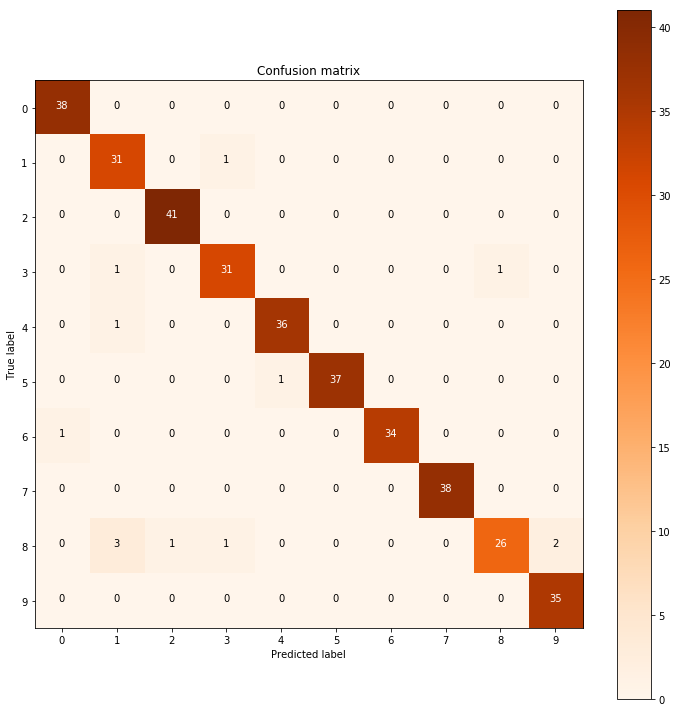

In [21]:
digits = load_digits()
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=4)
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)
classifier = RandomForestClassifier(criterion = 'entropy', random_state = 0 ) 
classifier.fit(x_train , y_train)
y_pred = classifier.predict(x_test)

print("Recall metric in the testing dataset : {}"\
      .format(metrics.accuracy_score(y_test , y_pred)))
print("accuracy metric in the testing dataset : {}"\
      .format(metrics.precision_score(y_test , y_pred , average='macro')))

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix = confusion_matrix(y_test , y_pred)
class_names = [i for i in range(0 , 10)]
plt.figure(figsize = (10 , 10))
plot_confusion_matrix(cnf_matrix , 
                      classes = class_names , 
                      title = 'Confusion matrix')
plt.show()

#### 隨機森林分類--調整參數生成200棵樹

Recall metric in the testing dataset : 0.9861111111111112
accuracy metric in the testing dataset : 0.9856386624128561


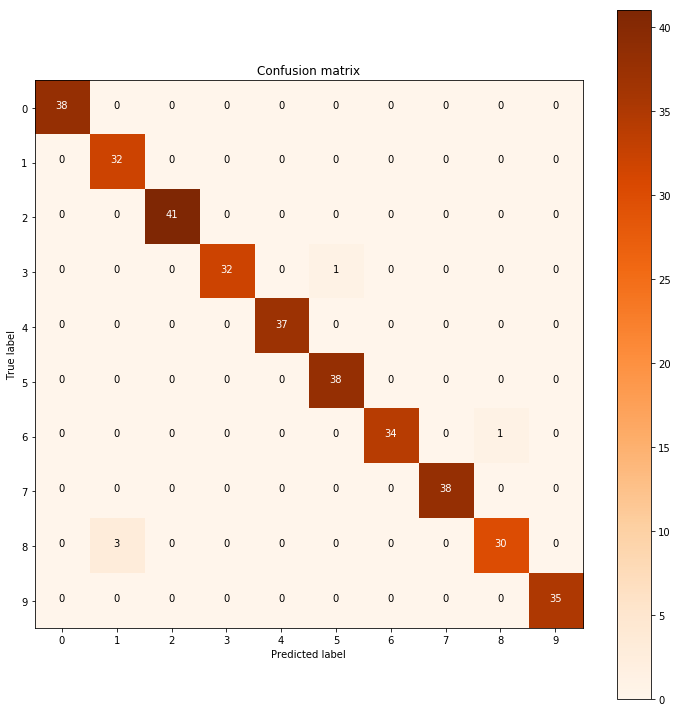

In [23]:
classifier = RandomForestClassifier(criterion = 'entropy' , 
                                    n_estimators = 200 ,
                                    oob_score = True , 
                                    random_state = 0 ) 
classifier.fit(x_train , y_train)
y_pred = classifier.predict(x_test)

print("Recall metric in the testing dataset : {}"\
      .format(metrics.accuracy_score(y_test , y_pred)))
print("accuracy metric in the testing dataset : {}"\
      .format(metrics.precision_score(y_test , y_pred , average='macro')))

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix = confusion_matrix(y_test , y_pred)
class_names = [i for i in range(0 , 10)]
plt.figure(figsize = (10 , 10))
plot_confusion_matrix(cnf_matrix , 
                      classes = class_names , 
                      title = 'Confusion matrix')
plt.show()

### 線性回歸與隨機森林回歸比較

In [24]:
boston = datasets.load_boston()
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
outcome = pd.DataFrame({'true_value':y_test , 'predict_value':y_pred})
print("The score of regressor : {}"\
      .format(regressor.score(x_train, y_train)))
print("Mean squared error : {}"\
      .format(mean_squared_error(y_test, y_pred)))

The score of regressor : 0.7730135569264234
Mean squared error : 33.44897999767653


C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


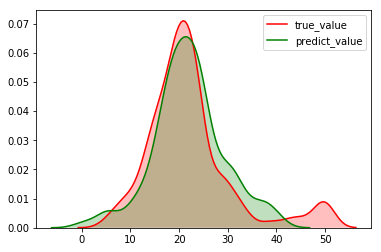

In [25]:
sns.kdeplot(outcome.iloc[: , 0] , shade=True, color="r")
sns.kdeplot(outcome.iloc[: , 1] , shade=True, color="g")

In [26]:
regressor = RandomForestRegressor(n_estimators = 100 , oob_score = True)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
outcome = pd.DataFrame({'true_value':y_test , 'predict_value':y_pred})
print("The score of regressor : {}"\
      .format(regressor.score(x_train, y_train)))
print("Mean squared error : {}"\
      .format(mean_squared_error(y_test, y_pred)))

The score of regressor : 0.9830861720759569
Mean squared error : 20.19061800000002


C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


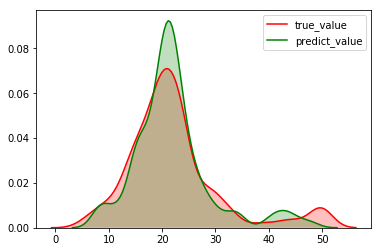

In [27]:
sns.kdeplot(outcome.iloc[: , 0] , shade=True, color="r")
sns.kdeplot(outcome.iloc[: , 1] , shade=True, color="g")